In [3]:
import sys
import os
sys.path.append(os.path.abspath("../"))  # so it can find src

from src.data_loader import load_data

# Load the dataset
file_path = "../data/TMDB_movies.csv"
df = load_data(file_path)

# Preview
df.head()


,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"drama,crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"comedy,drama,romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"drama,crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"drama,history,war",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"drama,crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


## Required Python Libraries for EDA

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

## 1. 📌 Dataset Overview

In [22]:
df.head(3)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"drama,crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"comedy,drama,romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"drama,crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280


In [23]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9985 non-null   int64         
 1   title              9985 non-null   object        
 2   genre              9985 non-null   object        
 3   original_language  9985 non-null   object        
 4   overview           9985 non-null   object        
 5   popularity         9985 non-null   float64       
 6   release_date       9985 non-null   datetime64[ns]
 7   vote_average       9985 non-null   float64       
 8   vote_count         9985 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 780.1+ KB


(9985, 9)

## 2. Check for Null Values

In [24]:
df.isnull().sum()

id                   0
title                0
genre                0
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

## 3. 🎭 Unique Genres & Languages

In [25]:
print("Unique genres:", df['genre'].nunique())
print("Genres:", df['genre'].unique())

print("Languages:", df['original_language'].value_counts().head(10))


Unique genres: 2123
Genres: ['drama,crime' 'comedy,drama,romance' 'drama,history,war' ...
 'action,tv movie,science fiction,comedy,adventure'
 'action,science fiction,war' 'adventure,fantasy,action,drama']
Languages: original_language
en    7809
fr     676
it     424
ja     275
es     195
de     104
ko      76
cn      54
zh      54
ru      47
Name: count, dtype: int64


## 4. 📊 Popularity & Votes Distribution

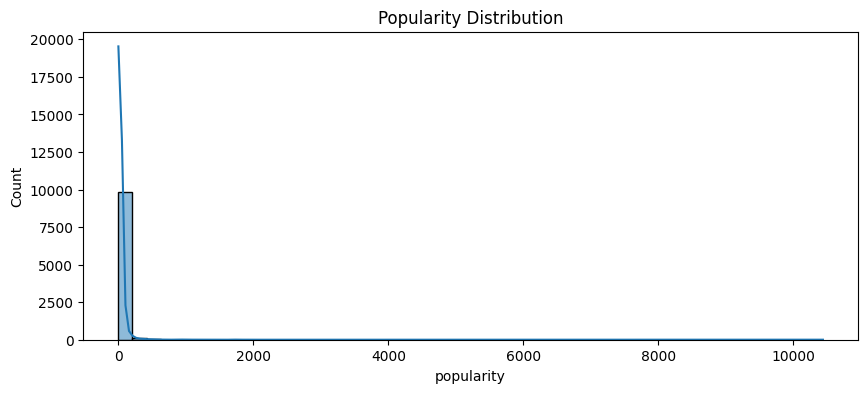

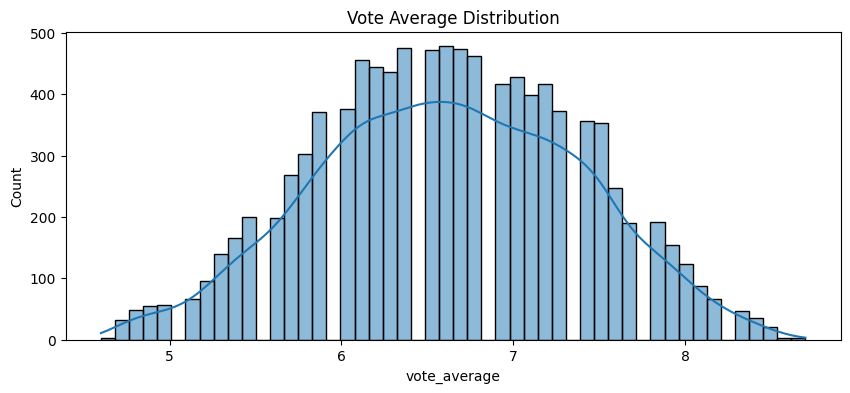

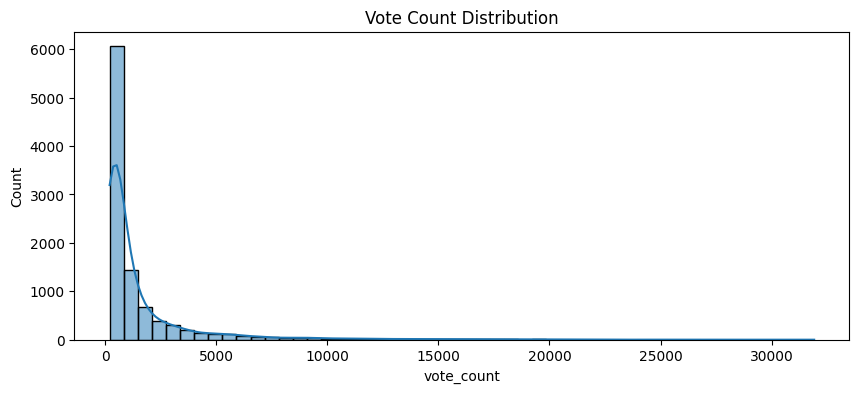

In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(df['popularity'], bins=50, kde=True)
plt.title("Popularity Distribution")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['vote_average'], bins=50, kde=True)
plt.title("Vote Average Distribution")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['vote_count'], bins=50, kde=True)
plt.title("Vote Count Distribution")
plt.show()

## 5. 📈 Year-wise Movie Trend

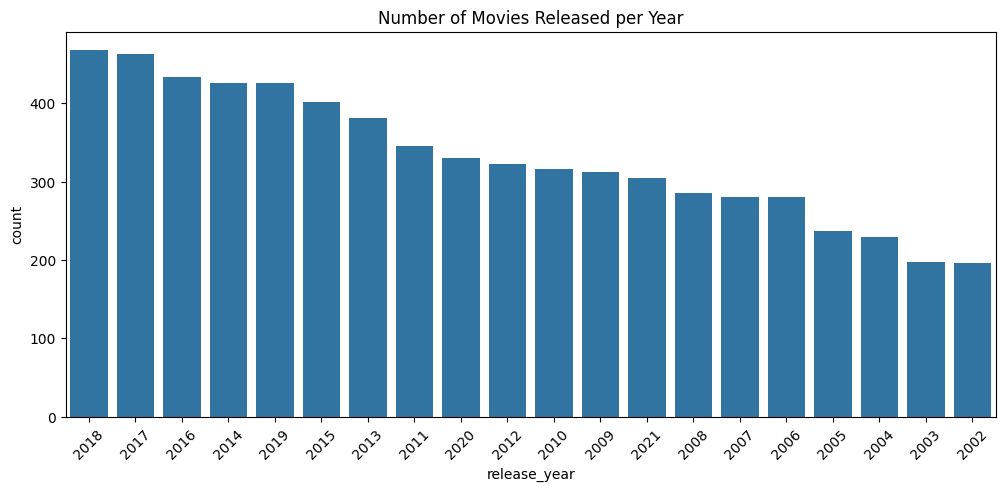

In [28]:
df['release_year'] = df['release_date'].dt.year

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='release_year', order=df['release_year'].value_counts().index[:20])
plt.title("Number of Movies Released per Year")
plt.xticks(rotation=45)
plt.show()

## 6. 🔥 Correlation Heatmap

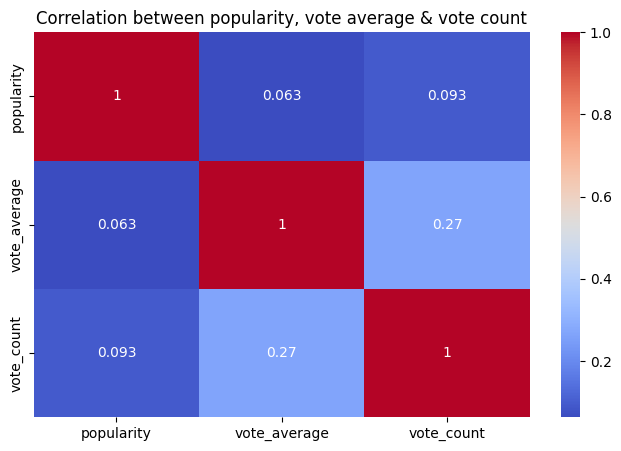

In [29]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['popularity', 'vote_average', 'vote_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between popularity, vote average & vote count")
plt.show()